<a href="https://colab.research.google.com/github/AngeloImon/Aulas-IA/blob/main/Prova_Pr%C3%A1tica_IA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prova prática de IA

## Descrição dos Dados
Dataset: Marketing Campaign

O dataset contém informações sobre clientes de uma campanha de marketing. Entre as variáveis disponíveis, destacam-se:

Dados Demográficos:

- Year_Birth: Ano de nascimento do cliente.

- Income: Renda anual do cliente.

Informações de Comportamento de Compra:

- Recency: Número de dias desde a última compra.

- MntWines, MntFruits, MntMeatProducts, etc.: Gastos com diferentes categorias de produtos.

- NumDealsPurchases, NumWebPurchases, NumStorePurchases, etc.: Quantidade de compras realizadas por diferentes canais.

Outras Variáveis:

- Dt_Customer: Data em que o cliente foi registrado. (Pode ser convertida para extração de ano, mês, etc.)

- Response: Uma variável que pode indicar a resposta à campanha (não utilizada para clustering).

## Descrição do Pipeline

1. Carregamento e Pré-processamento dos Dados

2. Leitura do Arquivo

3. Tratamento de Datas

4. Seleção de Variáveis

5. Conversão e Limpeza

6. Padronização

7. Aprendizado Não Supervisionado (Clustering)

8. Redução de Dimensionalidade e Visualização

9. Aprendizado Supervisionado (Treinamento de Modelo com Pseudo‑Rótulos)

10. Divisão dos Dados

11. Avaliação



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importação de funções do scikit-learn
from sklearn.preprocessing import StandardScaler   # Para padronizar os dados
from sklearn.cluster import KMeans                 # Para realizar clustering
from sklearn.decomposition import PCA              # Para reduzir a dimensionalidade e facilitar a visualização
from sklearn.metrics import silhouette_score       # Para avaliar a qualidade dos clusters
from sklearn.model_selection import train_test_split # Para dividir os dados
from sklearn.linear_model import LogisticRegression  # Modelo supervisionado (ex: regressão logística)
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# =============================================================================
# 1. Carregamento do Dataset
# =============================================================================

# Lê o arquivo Excel "marketing_campaign.xlsx" utilizando o engine 'openpyxl'
df = pd.read_excel("marketing_campaign.xlsx", engine='openpyxl')

# Exibir as primeiras linhas para ter uma visão geral dos dados

print("Primeiras linhas do dataset:")
print(df.head())

Primeiras linhas do dataset:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2

In [5]:
# ---------------------------------------------------------
# Informações Gerais e Estatísticas Descritivas
# ---------------------------------------------------------
print("\nInformações do dataset:")
print(df.info())

print("\nEstatísticas Descritivas:")
print(df.describe())


Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurch

In [6]:
# ---------------------------------------------------------
# Checar Valores Faltantes
# ---------------------------------------------------------
print("\nValores faltantes por coluna:")
print(df.isnull().sum())


Valores faltantes por coluna:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [7]:
# =============================================================================
# 2. Pré-processamento dos Dados
# =============================================================================
# Remover a coluna "ID" (se existir), pois ela não agrega valor para análise.
if 'ID' in df.columns:
    df = df.drop('ID', axis=1)

In [8]:
# Converter a coluna de data "Dt_Customer" para datetime, se existir, para possibilitar
# extração de novas features (como ano ou mês). Aqui, apenas convertemos:
if 'Dt_Customer' in df.columns:
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%Y-%m-%d')

# Selecionar as colunas numéricas para clustering.
# Essas colunas podem incluir: 'Year_Birth', 'Income', 'Kidhome', 'Teenhome',
# 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
# 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
# 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', etc.
# Aqui, selecionamos todas as colunas numéricas, mas removemos a coluna "Response"
# (caso exista) para não interferir no clustering.
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if 'Response' in numeric_cols:
    numeric_cols.remove('Response')

print("Colunas numéricas utilizadas para clustering:", numeric_cols)

Colunas numéricas utilizadas para clustering: ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue']


In [9]:
# Usar apenas as colunas numéricas para a etapa de clustering
# Removemos linhas com valores ausentes para simplificar

df_cluster = df[numeric_cols].dropna()
print("Dimensão dos dados para clustering:", df_cluster.shape)

# Padronizar os dados, essencial para algoritmos baseados em distância como o K-Means.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

Dimensão dos dados para clustering: (2216, 24)


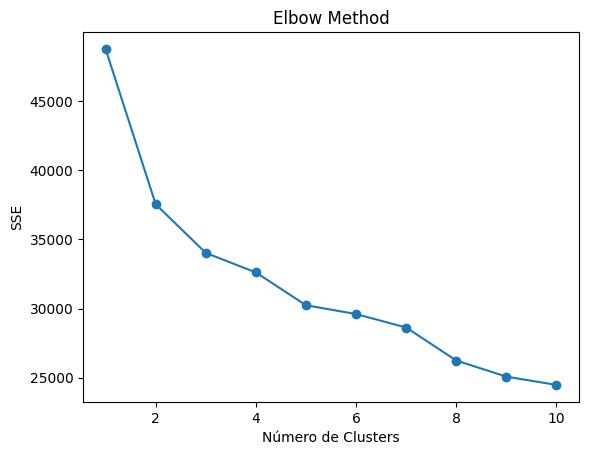

In [10]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


In [11]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, cluster_labels)
    print(f'Para k={k}, o Silhouette Score é {sil_score:.4f}')


Para k=2, o Silhouette Score é 0.2716
Para k=3, o Silhouette Score é 0.1987
Para k=4, o Silhouette Score é 0.1126
Para k=5, o Silhouette Score é 0.1289
Para k=6, o Silhouette Score é 0.1217
Para k=7, o Silhouette Score é 0.1254
Para k=8, o Silhouette Score é 0.1406
Para k=9, o Silhouette Score é 0.1458
Para k=10, o Silhouette Score é 0.1427


In [12]:
# =============================================================================
# 3. Aprendizado Não Supervisionado: Clustering com K-Means
# =============================================================================
# Definimos o número de clusters, por exemplo, k = 5 (a escolha pode ser baseada em métodos
# como o Elbow Method ou Silhouette Score).

k=3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

# Ajusta o modelo aos dados padronizados e retorna os pseudo‑rótulos para cada amostra.
cluster_labels = kmeans.fit_predict(X_scaled)

In [13]:
# Avalia a qualidade dos clusters com o Silhouette Score (valores mais altos indicam clusters bem definidos).

sil_score = silhouette_score(X_scaled, cluster_labels)

print("Silhouette Score:", sil_score)

# Adiciona os rótulos dos clusters ao DataFrame original (usando os índices dos dados que foram usados no clustering)
df_cluster['Cluster'] = cluster_labels

Silhouette Score: 0.1986933691424012


In [14]:
# =============================================================================
# 4. Visualização dos Clusters com PCA
# =============================================================================
# Reduzimos a dimensionalidade dos dados para 2 componentes, para que possamos visualizar os clusters em 2D.

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

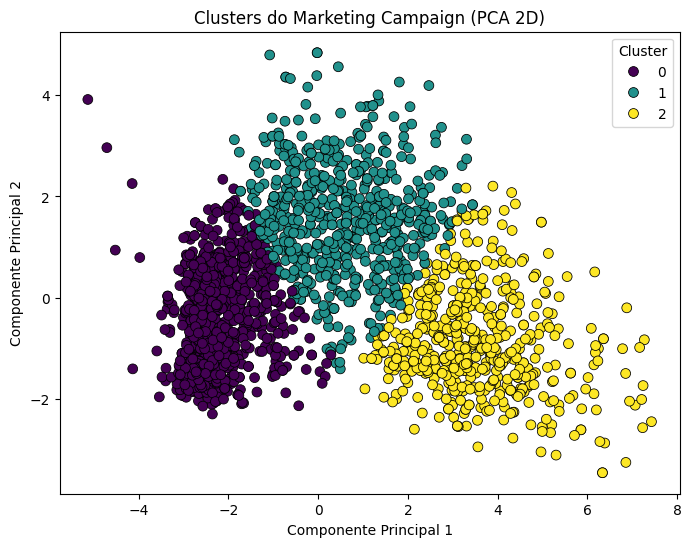

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', s=50, edgecolor='k')
plt.title("Clusters do Marketing Campaign (PCA 2D)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.show()

In [16]:
# =============================================================================
# 5. Aprendizado Supervisionado: Treinando um Modelo com os Pseudo-Rótulos
# =============================================================================
# Usamos os pseudo‑rótulos gerados pelo K-Means (Cluster) como alvo para treinar um modelo supervisionado.
# Dessa forma, o modelo aprenderá a "prever" o segmento de um cliente com base nas features originais.
# Aqui, usamos os dados padronizados (X_scaled) e os rótulos do clustering.

In [17]:
# Dividindo os dados em conjunto de treinamento (70%) e teste (30%).
# Use os dados escalados

X_train, X_test, y_train, y_test = train_test_split(X_scaled, cluster_labels, test_size=0.3, random_state=42)

# Criando e treinando um modelo supervisionado (Regressão Logística).
clf = LogisticRegression(max_iter=2000, random_state=42)
clf.fit(X_train, y_train)

# Fazendo predições no conjunto de teste

y_pred = clf.predict(X_test)

In [18]:
# Avaliando o modelo supervisionado com métricas de acurácia e relatório de classificação.

acc = accuracy_score(y_test, y_pred)

In [19]:
print("Acurácia do modelo supervisionado (previsão dos clusters):", acc)
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo supervisionado (previsão dos clusters): 0.9819548872180451

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       311
           1       0.99      0.95      0.97       193
           2       0.98      1.00      0.99       161

    accuracy                           0.98       665
   macro avg       0.98      0.98      0.98       665
weighted avg       0.98      0.98      0.98       665

